# Goodreads Predition

**Ideas**:

1. Filter based on user accounts (e.g. # followers, # reviews, etc) - will need to scrape Goodreads user data.
2. Exclude outliers and predict book rating based on number of reviews and book length etc.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def load_data(file_path):
    return pd.read_csv(file_path, sep=r'\s*,\s*', header=0, engine='python', error_bad_lines=False)
books = load_data("books.csv").set_index("bookID")

Skipping line 3350: Expected 12 fields in line 3350, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 4704: Expected 12 fields in line 4704, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5879: Expected 12 fields in line 5879, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 8981: Expected 12 fields in line 8981, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


## Exploratory Analysis

In [7]:
books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6   num_pages           11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [9]:
books.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


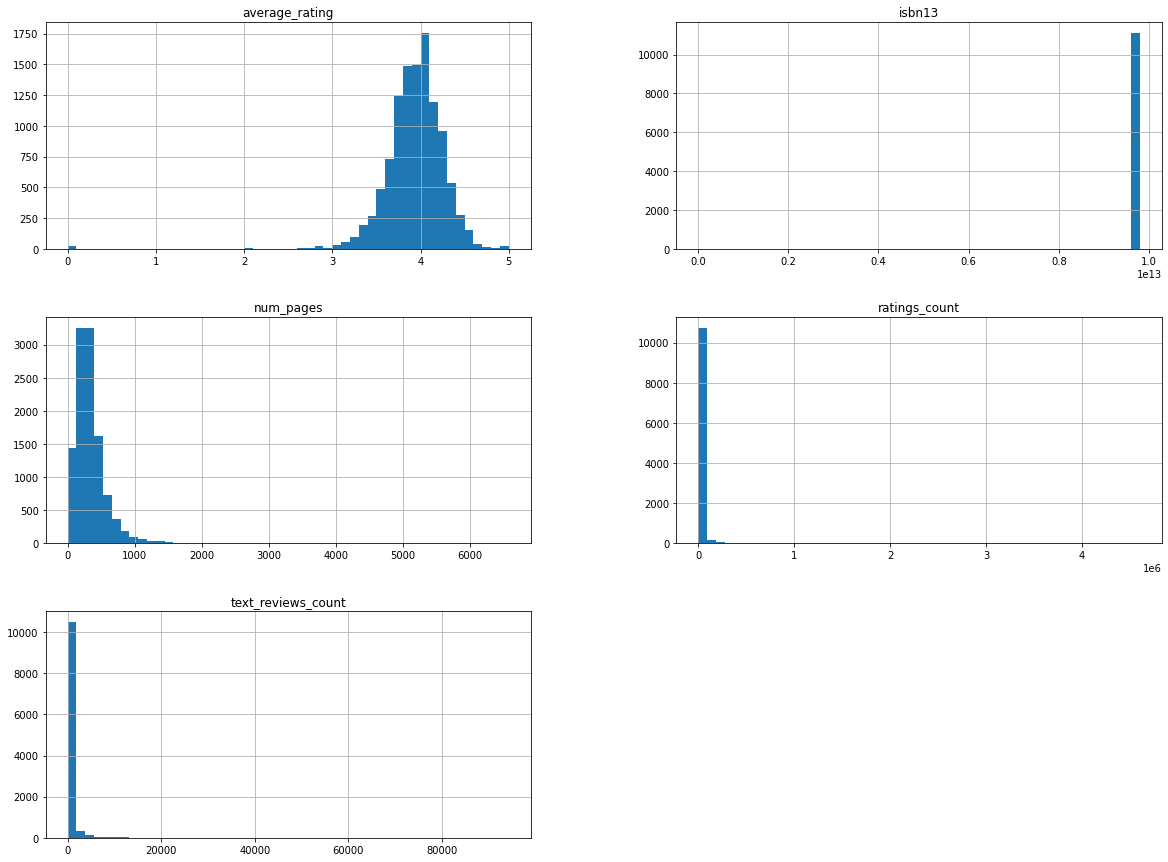

In [10]:
import matplotlib.pyplot as plt
books.hist(bins=50, figsize=(20,15))
#weather.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
corr_matrix = books.corr()
corr_matrix

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,0.033663,0.008152,0.036977,0.865977,1.000000


In [12]:
books[attributes].head()

NameError: name 'attributes' is not defined

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["average_rating","num_pages","ratings_count","text_reviews_count"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc334dcfb50>,
      dtype=object)

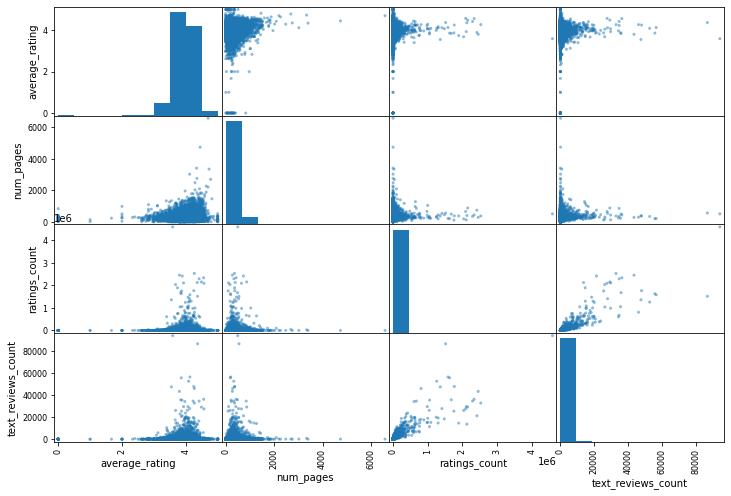

In [14]:
scatter_matrix(books[attributes], figsize=(12,8))

In [15]:
# Sorting by weighted factor - not ideal...weights num reviews highly!
books["weighted_rating"] = books["average_rating"]*books["ratings_count"]
books = books.sort_values(by="weighted_rating", ascending=False)

In [16]:
books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_rating
bookID,,,,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,16505620.94
5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,10806917.38
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,10668507.60
15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,10139316.46
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,9667719.83


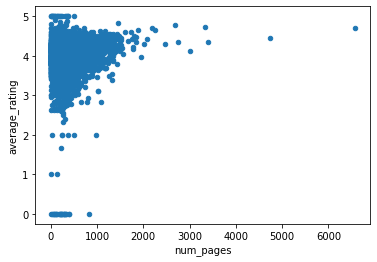

In [17]:
books.plot(kind="scatter", x="num_pages", y="average_rating")#, alpha=0.1, s=AVG_speed, label="Speed", figsize=(10,7), c=trips["ETA"], cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

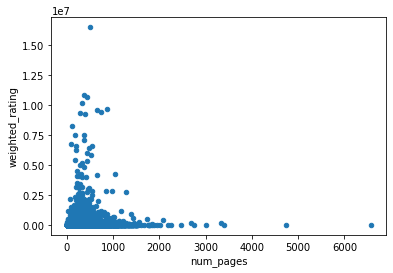

In [18]:
books.plot(kind="scatter", x="num_pages", y="weighted_rating")#, alpha=0.1, s=AVG_speed, label="Speed", figsize=(10,7), c=trips["ETA"], cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

## Data Visualisation

Text(0, 0.5, 'Authors')

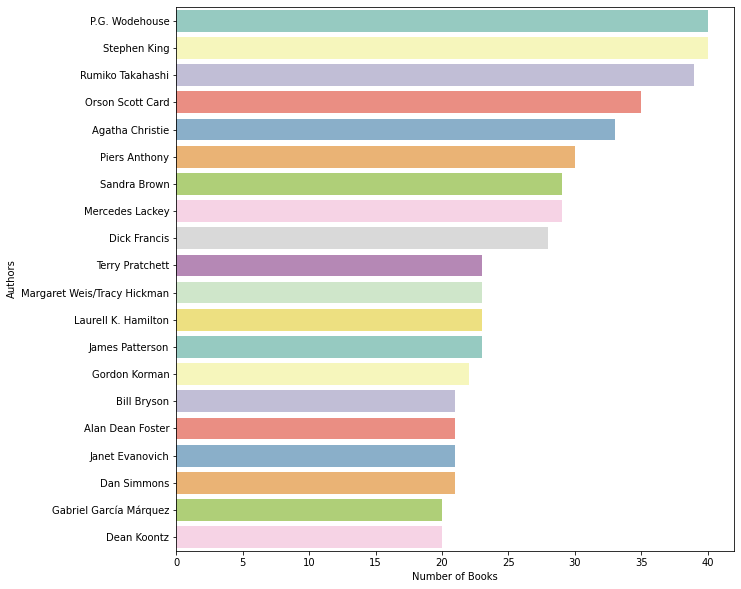

In [19]:
plt.figure(figsize=(10,10))
plot = sns.countplot(y = "authors", data = books, order = books['authors'].value_counts().iloc[:20].index, palette = "Set3")
plt.xlabel('Number of Books')
plt.ylabel('Authors')

Text(0.5, 0, 'Average Rating')

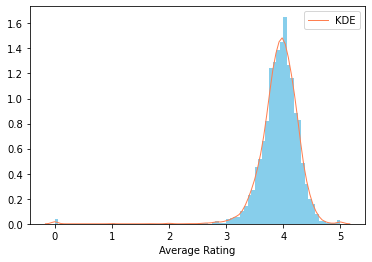

In [20]:
sns.distplot(books['average_rating'], 
             bins = 80,
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 1, "alpha": 1, "color": "skyblue"});
plt.xlabel("Average Rating")

(0.0, 2000.0)

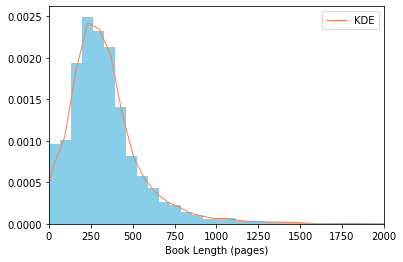

In [21]:
sns.distplot(books['num_pages'], 
             bins=100,
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 1, "alpha": 1, "color": "skyblue"});
plt.xlabel("Book Length (pages)")
plt.xlim(0,2000)

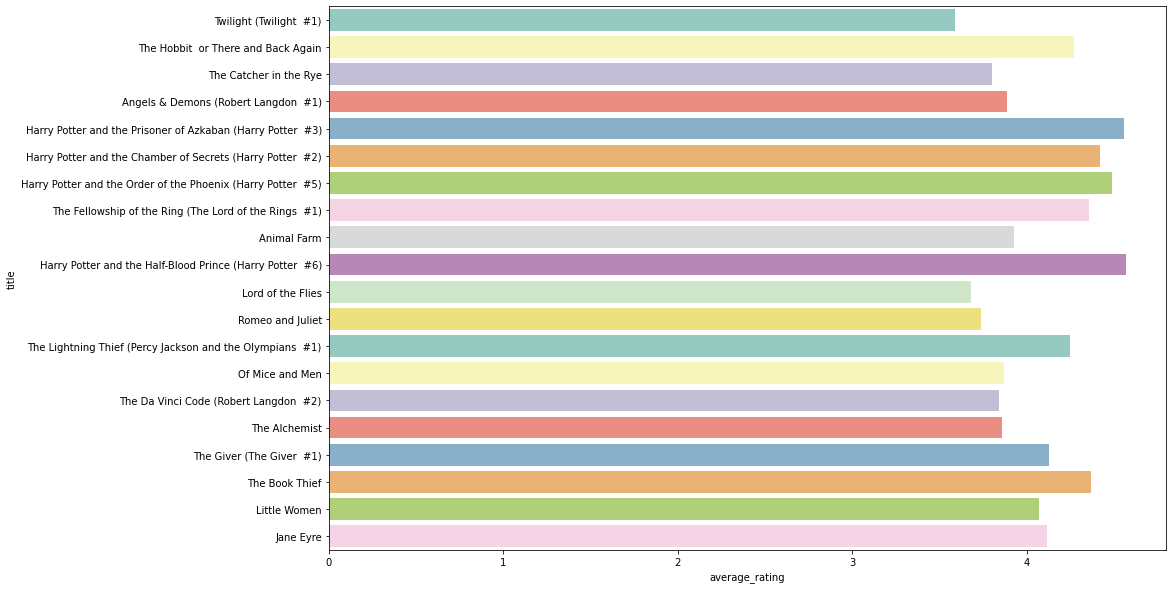

In [22]:
most_rated = books.sort_values('ratings_count', ascending = False).head(20).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['average_rating'], most_rated.index, palette='Set3')

<Figure size 1080x720 with 0 Axes>

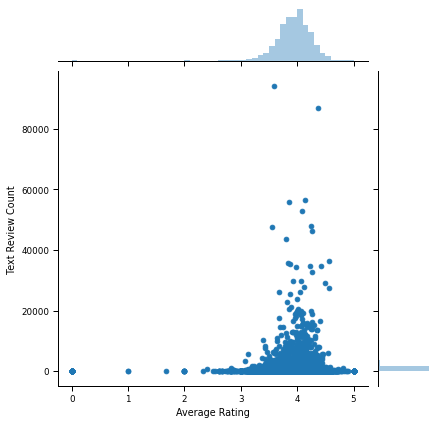

In [23]:
plt.figure(figsize=(15,10))
#books.dropna(0, inplace=True)
sns.set_context('paper')
ax = sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data= books[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

<Figure size 1080x720 with 0 Axes>

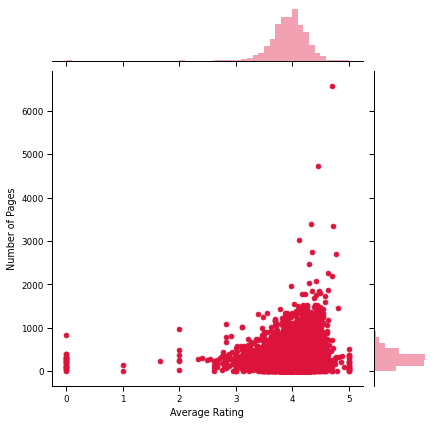

In [24]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = books, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

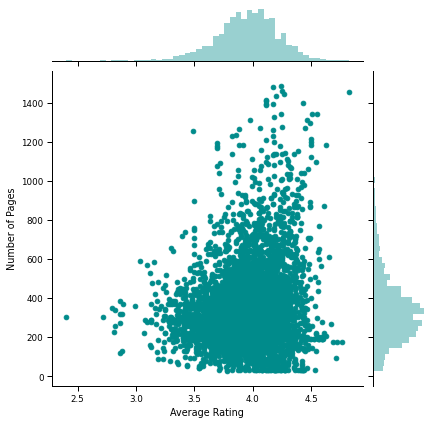

In [25]:
without_outliers = books[~ (books['num_pages']>1500) & (books['ratings_count']>50) & (books['text_reviews_count']>50) & (books['num_pages']>25)]
ax = sns.jointplot(x="average_rating", y="num_pages", data = without_outliers, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of Pages")

[Text(0, 0.5, 'Book Title'), Text(0.5, 0, 'Average Rating')]

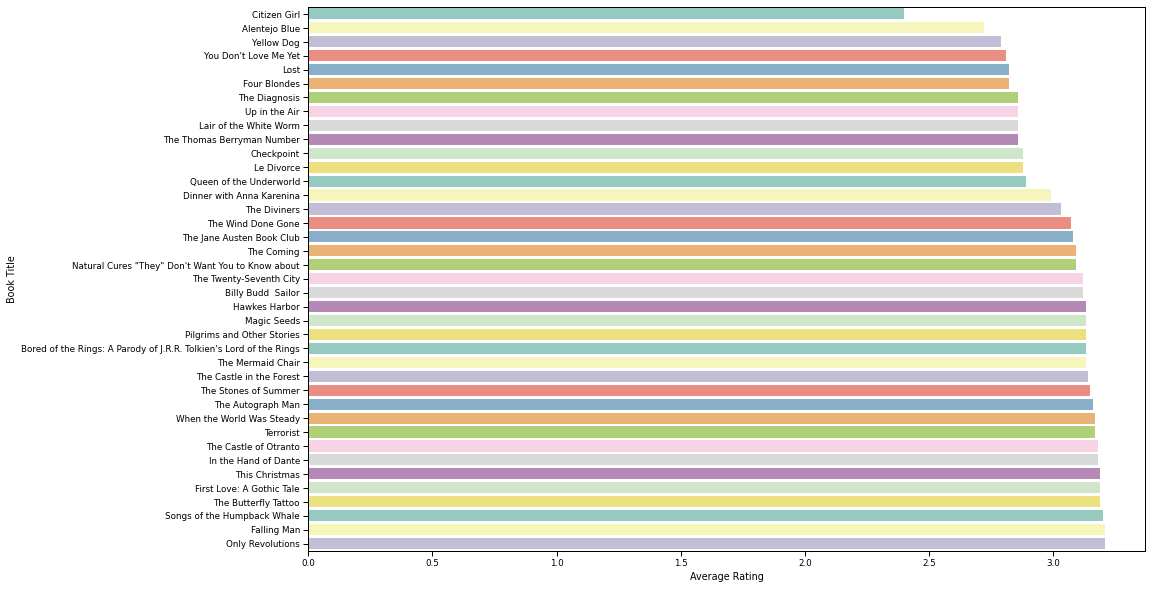

In [38]:
worst_books = without_outliers.sort_values('average_rating').set_index('title').head(40)
plt.figure(figsize=(15,10))
ax = sns.barplot(worst_books['average_rating'], worst_books.index, palette='Set3')
ax.set(xlabel="Average Rating", ylabel="Book Title")

[Text(0, 0.5, 'Book Title'), Text(0.5, 0, 'Average Rating')]

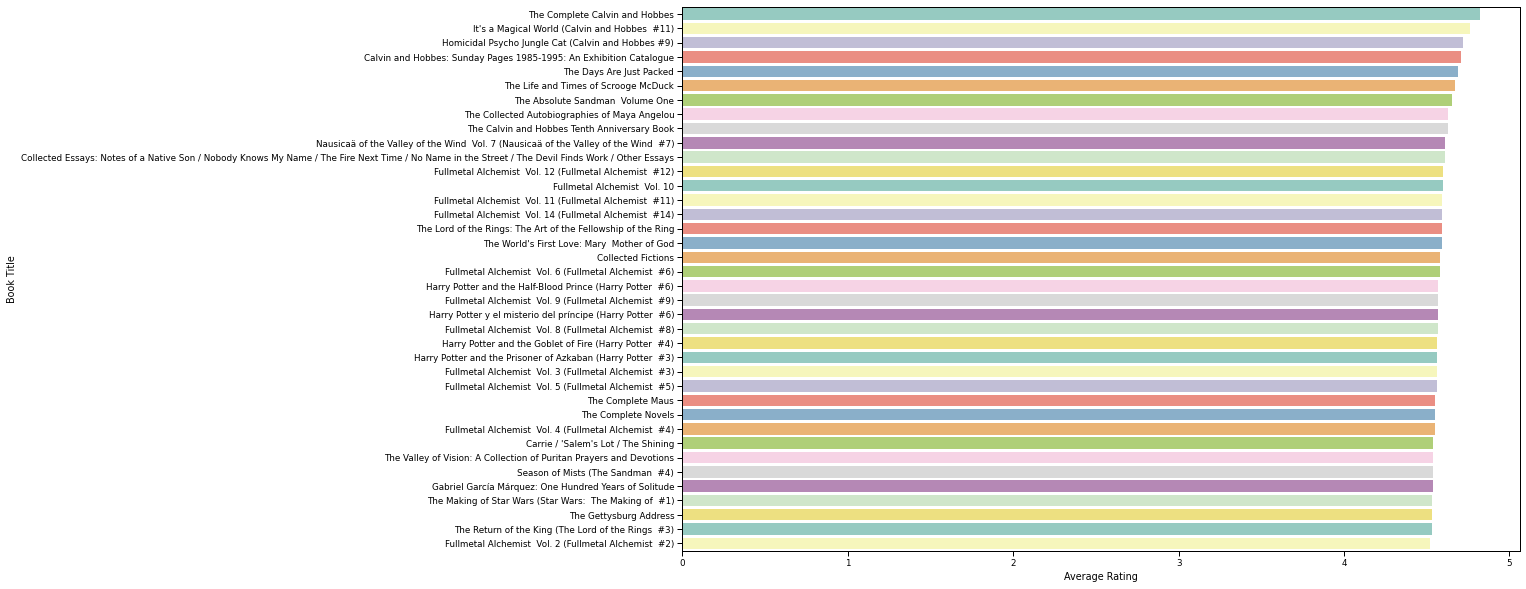

In [37]:
best_books = without_outliers.sort_values('average_rating', ascending=False).set_index('title').head(40)
plt.figure(figsize=(15,10))
ax = sns.barplot(best_books['average_rating'], best_books.index, palette='Set3')
ax.set(xlabel="Average Rating", ylabel="Book Title")

## Machine Learning Prediction and Recommendation

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_df, train_labels)

In [ ]:
# Split data for training
books_train = training.iloc[:-10000]
oot_df = training.iloc[-10000:]
oot_df.shape,train_df.shape
train_df = train_df.drop('Timestamp',axis=1)
train_labels = train_df["ETA"]
train_df = train_df.drop('ETA',axis=1)